In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full_moon_df = pd.read_csv("Moon_Data.csv",
                           index_col="Date", parse_dates=True)
#full_moon_df = full_moon_df.drop(columns=["Time (Universal Time)"])
full_moon_df

,Moon Phase,Time (Universal Time)
Date,,
2023-02-05,Full Moon,2025-01-11 18:28:00
2023-03-07,Full Moon,2025-01-11 12:40:00
2023-04-06,Full Moon,2025-01-11 04:34:00
2023-05-05,Full Moon,2025-01-11 17:34:00
2023-06-04,Full Moon,2025-01-11 03:42:00
...,...,...
2014-09-09,Full Moon,2025-01-11 01:38:00
2014-10-08,Full Moon,2025-01-11 10:51:00
2014-11-06,Full Moon,2025-01-11 22:23:00


In [ ]:
crime_1_df = pd.read_csv("Denver_Crime_Data .csv",
                         index_col="Occurrence Date", parse_dates=True)
crime_1_df

,Offense Category,Incident Address,Victim Count
Occurrence Date,,,
2019-01-01 10:00:00,burglary,2 N ADAMS ST,1
2019-01-01 10:00:00,all-other-crimes,2 N ADAMS ST,1
2019-01-01 10:00:00,other-crimes-against-persons,4991 N LOWELL BLVD,1
2019-01-01 10:00:00,larceny,1585 S COLORADO BLVD,1
2019-01-01 22:00:00,all-other-crimes,1300 BLOCK N FEDERAL BLVD,1
...,...,...,...
2023-09-09 21:00:00,auto-theft,6165 E ILIFF AVE,1
2023-09-09 21:00:00,auto-theft,W 38TH AVE / N SHOSHONE ST,1
2023-09-09 21:09:00,public-disorder,2800 W 10TH AVE,1


In [4]:
# Ensure date columns or indexes are in datetime format
full_moon_df.info()
crime_1_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 125 entries, 2023-02-05 to 2015-01-05
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Moon Phase             125 non-null    object
 1   Time (Universal Time)  125 non-null    object
dtypes: object(2)
memory usage: 2.9+ KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 386865 entries, 2019-01-01 10:00:00 to 2023-09-09 21:30:00
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Offense Category  386865 non-null  object
 1   Incident Address  386865 non-null  object
 2   Victim Count      386865 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 11.8+ MB


In [5]:
# Reset index for both dataframes before merging.
full_moon_df = full_moon_df.reset_index()
crime_1_df = crime_1_df.reset_index()
crime_1_df = crime_1_df.rename(columns={
    "Occurrence Date": "Date"
})

# Set date (day) as smallest incriment for consistency.
crime_1_df["Date"] = pd.to_datetime(crime_1_df["Date"]).dt.floor("D")
crime_1_df

,Date,Offense Category,Incident Address,Victim Count
0,2019-01-01,burglary,2 N ADAMS ST,1
1,2019-01-01,all-other-crimes,2 N ADAMS ST,1
2,2019-01-01,other-crimes-against-persons,4991 N LOWELL BLVD,1
3,2019-01-01,larceny,1585 S COLORADO BLVD,1
4,2019-01-01,all-other-crimes,1300 BLOCK N FEDERAL BLVD,1
...,...,...,...,...
386860,2023-09-09,auto-theft,6165 E ILIFF AVE,1
386861,2023-09-09,auto-theft,W 38TH AVE / N SHOSHONE ST,1
386862,2023-09-09,public-disorder,2800 W 10TH AVE,1
386863,2023-09-09,public-disorder,1300 BLK E 23RD AVE,1


In [6]:
# Check data types again
full_moon_df.info()
crime_1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   125 non-null    datetime64[ns]
 1   Moon Phase             125 non-null    object        
 2   Time (Universal Time)  125 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 3.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386865 entries, 0 to 386864
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              386865 non-null  datetime64[ns]
 1   Offense Category  386865 non-null  object        
 2   Incident Address  386865 non-null  object        
 3   Victim Count      386865 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 11.8+ MB


In [7]:
# Ensure dates match before creating merged dataframe

# This ended up being unnecesary.
max_crime_date = crime_1_df["Date"].max()
min_crime_date = crime_1_df["Date"].min()
full_moon_limited = full_moon_df[
    (full_moon_df["Date"] <= max_crime_date) &
    (full_moon_df["Date"] >= min_crime_date)
]

#However, this was needed.
full_moon_limited = full_moon_limited.drop_duplicates(subset=["Date"])
full_moon_limited.shape

(72, 3)

In [8]:
# Merge dataframes and fill absent moon phase values with "Other"
merged_df = crime_1_df.merge(
    full_moon_limited,
    how="left",
    on="Date"
).fillna("Other")
merged_df

,Date,Offense Category,Incident Address,Victim Count,Moon Phase,Time (Universal Time)
0,2019-01-01,burglary,2 N ADAMS ST,1,Other,Other
1,2019-01-01,all-other-crimes,2 N ADAMS ST,1,Other,Other
2,2019-01-01,other-crimes-against-persons,4991 N LOWELL BLVD,1,Other,Other
3,2019-01-01,larceny,1585 S COLORADO BLVD,1,Other,Other
4,2019-01-01,all-other-crimes,1300 BLOCK N FEDERAL BLVD,1,Other,Other
...,...,...,...,...,...,...
386860,2023-09-09,auto-theft,6165 E ILIFF AVE,1,Other,Other
386861,2023-09-09,auto-theft,W 38TH AVE / N SHOSHONE ST,1,Other,Other
386862,2023-09-09,public-disorder,2800 W 10TH AVE,1,Other,Other
386863,2023-09-09,public-disorder,1300 BLK E 23RD AVE,1,Other,Other


In [9]:
# Create a dictionary of full moon and other counts for total rows (i.e. individual crimes)
moon_phase_crimes = merged_df["Moon Phase"].value_counts().to_dict()
moon_phase_crimes

{'Other': 373335, 'Full Moon': 13530}

In [10]:
# Get a total count for non-full-moon dates (i.e. days with "Other")
other_dates = merged_df[merged_df["Moon Phase"] == "Other"]
days_other_moon = other_dates["Date"].nunique()
days_other_moon

2029

In [11]:
# Get a total count for individual crimes in each condition
days_full_moon = 72
full_moon_crimes = moon_phase_crimes.get("Full Moon")
other_moon_crimes = moon_phase_crimes.get("Other")
other_moon_crimes

373335

In [12]:
# Do the math for crime rate and percentage increase
full_crime_rate = full_moon_crimes / days_full_moon
other_crime_rate = other_moon_crimes / days_other_moon
percent_increase = (full_crime_rate / other_crime_rate - 1) * 100

print(f"The crime rate during a full moon is {full_crime_rate:.2f} against a control rate of {other_crime_rate:.2f}.")
print(f"These initial findings indicate a increased crime rate of {percent_increase:.2f}% above the base line.")


The crime rate during a full moon is 187.92 against a control rate of 184.00.
These initial findings indicate a increased crime rate of 2.13% above the base line.


In [13]:
merged_df.head()

,Date,Offense Category,Incident Address,Victim Count,Moon Phase,Time (Universal Time)
0,2019-01-01,burglary,2 N ADAMS ST,1,Other,Other
1,2019-01-01,all-other-crimes,2 N ADAMS ST,1,Other,Other
2,2019-01-01,other-crimes-against-persons,4991 N LOWELL BLVD,1,Other,Other
3,2019-01-01,larceny,1585 S COLORADO BLVD,1,Other,Other
4,2019-01-01,all-other-crimes,1300 BLOCK N FEDERAL BLVD,1,Other,Other


In [38]:
offense_counts = merged_df.groupby("Moon Phase")["Offense Category"].value_counts().to_dict()
offense_counts

{('Full Moon', 'theft-from-motor-vehicle'): 2234,
 ('Full Moon', 'public-disorder'): 2002,
 ('Full Moon', 'larceny'): 2000,
 ('Full Moon', 'auto-theft'): 1954,
 ('Full Moon', 'all-other-crimes'): 1648,
 ('Full Moon', 'burglary'): 950,
 ('Full Moon', 'drug-alcohol'): 783,
 ('Full Moon', 'other-crimes-against-persons'): 706,
 ('Full Moon', 'aggravated-assault'): 583,
 ('Full Moon', 'robbery'): 241,
 ('Full Moon', 'white-collar-crime'): 224,
 ('Full Moon', 'sexual-assault'): 153,
 ('Full Moon', 'arson'): 30,
 ('Full Moon', 'murder'): 22,
 ('Other', 'theft-from-motor-vehicle'): 62406,
 ('Other', 'public-disorder'): 54879,
 ('Other', 'larceny'): 54243,
 ('Other', 'auto-theft'): 53999,
 ('Other', 'all-other-crimes'): 45120,
 ('Other', 'burglary'): 26711,
 ('Other', 'drug-alcohol'): 21021,
 ('Other', 'other-crimes-against-persons'): 19780,
 ('Other', 'aggravated-assault'): 16630,
 ('Other', 'robbery'): 6731,
 ('Other', 'white-collar-crime'): 6482,
 ('Other', 'sexual-assault'): 4144,
 ('Other'

In [15]:
full_moon_murders = offense_counts.get(("Full Moon", "murder"), 0)
other_moon_murders = offense_counts.get(("Other", "murder"), 0)

In [16]:
full_moon_murder_rate = full_moon_murders / days_full_moon
other_moon_murder_rate = other_moon_murders / days_other_moon
murder_increase = (full_moon_murder_rate / other_moon_murder_rate - 1) * 100

print(f"The murder rate during a full moon is {full_moon_murder_rate:.2f} against a control rate of {other_moon_murder_rate:.2f}.")
print(f"These initial findings indicate a increased murder rate of {murder_increase:.2f}% above the base line.")

The murder rate during a full moon is 0.31 against a control rate of 0.19.
These initial findings indicate a increased murder rate of 58.97% above the base line.


In [17]:
full_moon_assaults = offense_counts.get(("Full Moon", "aggravated-assault"), 0)
other_moon_assaults = offense_counts.get(("Other", "aggravated-assault"), 0)

full_moon_assault_rate = full_moon_assaults / days_full_moon
other_moon_assault_rate = other_moon_assaults / days_other_moon
assault_increase = (full_moon_assault_rate / other_moon_assault_rate - 1) * 100

print(f"The assault rate during a full moon is {full_moon_assault_rate:.2f} against a control rate of {other_moon_assault_rate:.2f}.")
print(f"These initial findings indicate a increased assault rate of {assault_increase:.2f}% above the base line.")

The assault rate during a full moon is 8.10 against a control rate of 8.20.
These initial findings indicate a increased assault rate of -1.21% above the base line.


In [18]:
# Get larceny counts from offense_counts
full_moon_larceny = offense_counts.get(("Full Moon", "larceny"), 0)
other_moon_larceny = offense_counts.get(("Other", "larceny"), 0)

# Calculate rates
full_moon_larceny_rate = full_moon_larceny / days_full_moon
other_moon_larceny_rate = other_moon_larceny / days_other_moon

# Calculate percentage increase
larceny_increase = (full_moon_larceny_rate / other_moon_larceny_rate - 1) * 100

print(f"The larceny rate during a full moon is {full_moon_larceny_rate:.2f} against a control rate of {other_moon_larceny_rate:.2f}.")
print(f"These initial findings indicate an increased larceny rate of {larceny_increase:.2f}% above the baseline.")

The larceny rate during a full moon is 27.78 against a control rate of 26.73.
These initial findings indicate an increased larceny rate of 3.90% above the baseline.


In [19]:
merged_df.head()

,Date,Offense Category,Incident Address,Victim Count,Moon Phase,Time (Universal Time)
0,2019-01-01,burglary,2 N ADAMS ST,1,Other,Other
1,2019-01-01,all-other-crimes,2 N ADAMS ST,1,Other,Other
2,2019-01-01,other-crimes-against-persons,4991 N LOWELL BLVD,1,Other,Other
3,2019-01-01,larceny,1585 S COLORADO BLVD,1,Other,Other
4,2019-01-01,all-other-crimes,1300 BLOCK N FEDERAL BLVD,1,Other,Other


In [20]:
daily_crime_pivot = merged_df.pivot_table(
    values="Victim Count",
    index="Date",
    columns="Moon Phase",
    aggfunc="sum",
    fill_value=0
)
daily_crime_pivot

Moon Phase,Full Moon,Other
Date,,
2018-01-02,143,0
2018-01-03,0,160
2018-01-04,0,141
2018-01-05,0,128
2018-01-06,0,164
...,...,...
2023-09-29,214,0
2023-09-30,0,176
2023-10-01,0,169


In [21]:
full_moon_daily = daily_crime_pivot[
    daily_crime_pivot["Full Moon"] > 0].drop(columns="Other")
full_moon_daily

Moon Phase,Full Moon
Date,
2018-01-02,143
2018-01-31,147
2018-03-02,155
2018-03-31,137
2018-04-30,153
...,...
2023-06-04,190
2023-07-03,232
2023-08-01,243


In [22]:
other_moon_daily = daily_crime_pivot[
    daily_crime_pivot["Other"] > 0].drop(columns="Full Moon")
other_moon_daily

Moon Phase,Other
Date,
2018-01-03,160
2018-01-04,141
2018-01-05,128
2018-01-06,164
2018-01-07,126
...,...
2023-09-28,217
2023-09-30,176
2023-10-01,169


In [23]:
full_moon_daily

Moon Phase,Full Moon
Date,
2018-01-02,143
2018-01-31,147
2018-03-02,155
2018-03-31,137
2018-04-30,153
...,...
2023-06-04,190
2023-07-03,232
2023-08-01,243


<Axes: ylabel='Frequency'>

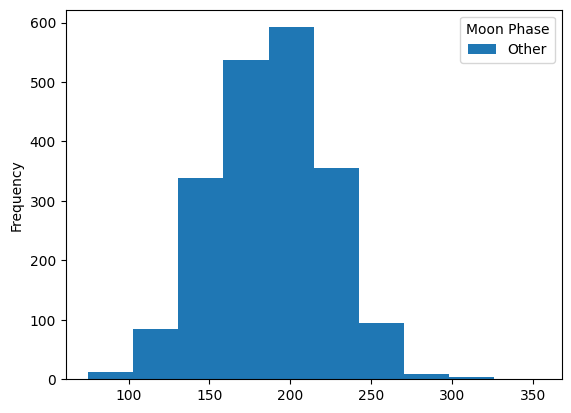

In [24]:
other_moon_daily.plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

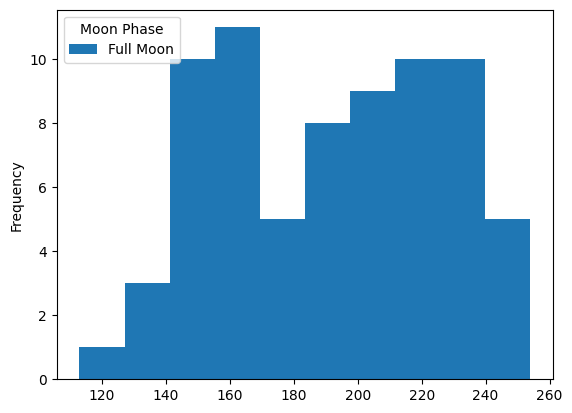

In [25]:
full_moon_daily.plot(kind="hist", bins=10)

In [ ]:
# Resample 100,000 times to establish confidence in directional relationship (i.e. more crime during full moon)

bootstrap_differences = []

for _ in range(100000):
    full_moon_sample = full_moon_daily.sample(frac=1, replace=True)
    other_moon_sample = other_moon_daily.sample(frac=1, replace=True)

    boot_rate_full_moon = full_moon_sample["Full Moon"].mean()
    boot_rate_other_moon = other_moon_sample["Other"].mean()

    bootstrap_differences.append(boot_rate_full_moon - boot_rate_other_moon)

bootstrap_differences = np.array(bootstrap_differences)

lower_bound = np.percentile(bootstrap_differences, 2.5)
upper_bound = np.percentile(bootstrap_differences, 97.5)

print(f"There is a 95% confidence interval that the increase in crime rate during a full moon is between {lower_bound:.2f} and {upper_bound:.2f}.")

prob_greater_than_0 = (np.mean(bootstrap_differences > 0) * 100).round(0)

print(f"Based on the provided data, the liklihood that full moon days have higher crime rate compared to non-full-moon days is {prob_greater_than_0:.0f}%")

There is a 95% confidence interval that the increase in crime rate during a full moon is between -3.92 and 12.13.
Based on the provided data, the liklihood that full moon days have higher crime rate compared to non-full-moon days is 84%


In [27]:
murder_df = merged_df[merged_df["Offense Category"] == "murder"]
murder_df

,Date,Offense Category,Incident Address,Victim Count,Moon Phase,Time (Universal Time)
330,2020-01-01,murder,S SHERIDAN BLVD / W JEWELL AVE,1,Other,Other
806,2022-01-01,murder,1919 BLAKE ST,2,Other,Other
1738,2021-01-10,murder,1767 S LOGAN ST,2,Other,Other
3279,2023-01-11,murder,5400 BLK N ATCHISON WAY,1,Other,Other
5059,2022-01-13,murder,9430 W WAGON TRAIL DR,1,Other,Other
...,...,...,...,...,...,...
383901,2020-09-07,murder,10150 E HARVARD AVE,1,Other,Other
384910,2020-09-08,murder,1100 BLK ST FRANCIS WAY,1,Other,Other
385971,2019-09-09,murder,1255 19TH ST,1,Other,Other
386149,2020-09-09,murder,W 10TH AVE / N SANTA FE DR,1,Other,Other


In [28]:
daily_murder_pivot = murder_df.pivot_table(
    values="Victim Count",
    index="Date",
    columns="Moon Phase",
    aggfunc="sum",
    fill_value=0
)

other_moon_murder_daily = daily_murder_pivot[
    daily_crime_pivot["Other"] > 0].drop(columns="Full Moon")
full_moon_murder_daily = daily_murder_pivot[
    daily_murder_pivot["Full Moon"] > 0].drop(columns="Other")
full_moon_murder_daily

/var/folders/vt/jy8dcmxj29vfz95p7lls9h1m0000gn/T/ipykernel_50808/4271343010.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  other_moon_murder_daily = daily_murder_pivot[


Moon Phase,Full Moon
Date,
2018-04-30,1
2018-12-22,3
2019-01-21,1
2019-02-19,1
2019-03-21,1
2019-04-19,1
2019-08-15,1
2019-10-13,1
2020-02-09,1


In [ ]:
# Resample 100,000 times to establish confidence in directional relationship (i.e. more murder during full moon)

murder_differences = []

for _ in range(100000):
    # Resample with replacement
    full_moon_murder_sample = full_moon_murder_daily.sample(frac=1, replace=True)
    other_moon_murder_sample = other_moon_murder_daily.sample(frac=1, replace=True)

    # Calculate mean rates for resamples
    murder_rate_full_moon = full_moon_murder_sample["Full Moon"].mean()
    murder_rate_other_moon = other_moon_murder_sample["Other"].mean()

    # Store the difference
    murder_differences.append(murder_rate_full_moon - murder_rate_other_moon)

# Convert to NumPy array for easier calculations
murder_differences = np.array(murder_differences)

# Calculate confidence intervals
lower_bound = np.percentile(murder_differences, 2.5)
upper_bound = np.percentile(murder_differences, 97.5)

print(f"There is a 95% confidence that the increase in murder rate during a full moon is between {lower_bound:.2f} and {upper_bound:.2f}.")

murder_prob_greater_than_0 = (np.mean(murder_differences > 0) * 100).round(0)
print(f"The probability that the full moon days have a higher murder rate compared to non-full moon days is {murder_prob_greater_than_0:.0f}%")

There is a 95% confidence that the increase in murder rate during a full moon is between -0.21 and 0.32.
The probability that the full moon days have a higher murder rate compared to non-full moon days is 51%


In [ ]:
# What are the chances that an apparent pattern in such a large sample size is due to random chance?
# This randomly shuffles data from each condition 100,000 times to 

# Calculate P-value
observed_diff = full_moon_daily["Full Moon"].mean() - \
                other_moon_daily["Other"].mean()

# Combine all daily crime counts
combined = np.concatenate([
    full_moon_daily["Full Moon"].values,
    other_moon_daily["Other"].values
])

permuted_differences = []

for _ in range(100000):
    # Shuffle the combined data
    np.random.shuffle(combined)
    
    # Split into resampled groups
    permuted_full_moon = combined[:len(full_moon_daily)]
    permuted_other_moon = combined[len(full_moon_daily):]
    
    # Calculate the difference for this permutation
    permuted_differences.append(np.mean(permuted_full_moon) - np.mean(permuted_other_moon))

# Convert to NumPy array
permuted_differences = np.array(permuted_differences)

# Calculate p-value
p_value_perm = ((np.mean(np.abs(permuted_differences) >= np.abs(observed_diff))) * 100).round(1)
print(f"There is a {p_value_perm:.0f}% probability of observing a difference in crime rate due to random chance.")

if p_value_perm <= 5:
    print("This is a statistically significant finding")
else:
    print("This finding does not represent a statistical significance.")


There is a 33% probability of observing a difference in crime rate due to random chance.
This finding does not represent a statistical significance.


In [31]:
merged_df["Offense Category"].value_counts()

Offense Category
theft-from-motor-vehicle        64640
public-disorder                 56881
larceny                         56243
auto-theft                      55953
all-other-crimes                46768
burglary                        27661
drug-alcohol                    21804
other-crimes-against-persons    20486
aggravated-assault              17213
robbery                          6972
white-collar-crime               6706
sexual-assault                   4297
arson                             829
murder                            412
Name: count, dtype: int64

In [32]:
# Looking specifically at public disorder charges
disorder_df = merged_df[merged_df["Offense Category"] == "public-disorder"]
disorder_df

,Date,Offense Category,Incident Address,Victim Count,Moon Phase,Time (Universal Time)
11,2019-01-01,public-disorder,290 PARK AVEW,1,Other,Other
16,2019-01-01,public-disorder,4390 W EXPOSITION AVE,1,Other,Other
46,2019-01-01,public-disorder,6260 E COLFAX AVE,1,Other,Other
52,2019-01-01,public-disorder,257 N PEARL ST,1,Other,Other
55,2019-01-01,public-disorder,4551 N BISCAY ST,1,Other,Other
...,...,...,...,...,...,...
386848,2023-09-09,public-disorder,5120 N BROADWAY ST,1,Other,Other
386849,2023-09-09,public-disorder,7753 E 40TH AVE,1,Other,Other
386857,2023-09-09,public-disorder,900 BLK W 12TH AVE,1,Other,Other
386862,2023-09-09,public-disorder,2800 W 10TH AVE,1,Other,Other


In [33]:
disorder_pivot = disorder_df.pivot_table(
    values="Victim Count",
    index="Date",
    columns="Moon Phase",
    aggfunc="sum",
).fillna(0)
disorder_pivot

Moon Phase,Full Moon,Other
Date,,
2018-01-02,22.0,0.0
2018-01-03,0.0,31.0
2018-01-04,0.0,27.0
2018-01-05,0.0,17.0
2018-01-06,0.0,18.0
...,...,...
2023-09-29,27.0,0.0
2023-09-30,0.0,27.0
2023-10-01,0.0,32.0


In [34]:
full_moon_disorder = disorder_pivot[disorder_pivot["Full Moon"] > 0].drop(columns="Other")
other_moon_disorder = disorder_pivot[disorder_pivot["Other"] > 0].drop(columns="Full Moon")
other_moon_disorder


Moon Phase,Other
Date,
2018-01-03,31.0
2018-01-04,27.0
2018-01-05,17.0
2018-01-06,18.0
2018-01-07,18.0
...,...
2023-09-28,32.0
2023-09-30,27.0
2023-10-01,32.0


<Axes: ylabel='Frequency'>

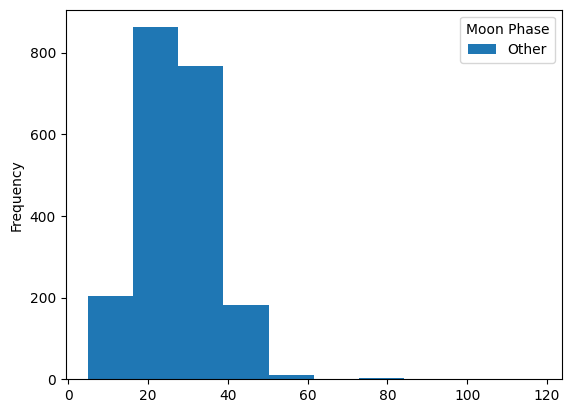

In [ ]:
# Does this data follow a normal distribution
other_moon_disorder.plot(kind="hist", bins=10)

<Axes: ylabel='Frequency'>

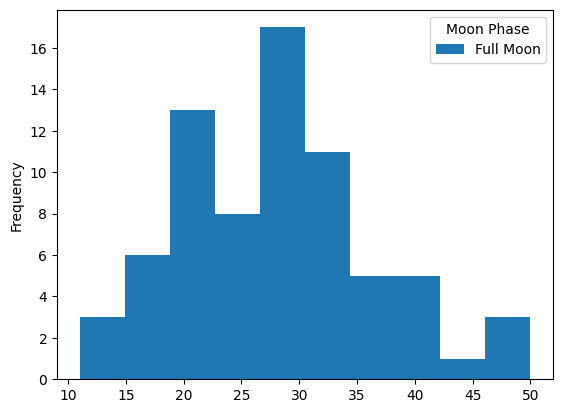

In [36]:
full_moon_disorder.plot(kind="hist", bins=10)